# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [6]:
LV_NAME = "LV444"

In [62]:
LV_AXIS_THRESHOLD = 1.0  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [8]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [9]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [10]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [11]:
multiplier_model_summary.shape

(2157, 5)

In [12]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [13]:
# INPUT_SUBSET = "z_score_std"

In [14]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [15]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [16]:
# data = pd.read_pickle(input_filepath)

In [17]:
# data.shape

In [18]:
# data.head()

## LV data

In [19]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [20]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [21]:
lv_data = lv_obj.get_experiments_data()

SRP060416, SRP055569, SRP011422, SRP066834, SRP029334, SRP057196, SRP002326, SRP064464, SRP042161, SRP015013, SRP059775, SRP050499, SRP048744, SRP025989, SRP055153, SRP008775, SRP063840, SRP011578, SRP057205, SRP015976, SRP055513, SRP033135, SRP012461, SRP063500, SRP009247, SRP009862, SRP058773, SRP052740, SRP017777, SRP014213, SRP022260, SRP064735, SRP018838, SRP041036, SRP013363, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (33 != 35)
  warnings.warn(


In [22]:
lv_data.shape

(5654, 62)

In [23]:
lv_data.head()

tonsil donor facs gating                     cell type  \
project   run                                                                 
SRP060416 SRR2088096    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088128    Donor T74        ILC3  tonsil Innate lymphoid cells   
          SRR2088153    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088179    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088205    Donor T75        ILC3  tonsil Innate lymphoid cells   

                     cell line tissue Stage  age c1 chip id  \
project   run                                                 
SRP060416 SRR2088096       NaN    NaN   NaN  NaN        NaN   
          SRR2088128       NaN    NaN   NaN  NaN        NaN   
          SRR2088153       NaN    NaN   NaN  NaN        NaN   
          SRR2088179       NaN    NaN   NaN  NaN        NaN   
          SRR2088205       NaN    NaN   NaN  NaN        NaN   

                     experiment_sample_name diagnosis  ... agent  \
project   run                                          ...         
SRP060416 SRR2088096                    NaN       NaN  ...   NaN   
          SRR2088128                    NaN       NaN  ...   NaN   
          SRR2088153                    NaN       NaN  ...   NaN   
          SRR2088179                    NaN       NaN  ...   NaN   
          SRR2088205                    NaN       NaN  ...   NaN   

                     lentivirus-introduced modification  \
project   run                                             
SRP060416 SRR2088096                                NaN   
          SRR2088128                                NaN   
          SRR2088153                                NaN   
          SRR2088179                                NaN   
          SRR2088205                                NaN   

                     cell culture condition labexpid tissue source timepoint  \
project   run                                                                  
SRP060416 SRR2088096                    NaN      NaN           NaN       NaN   
          SRR2088128                    NaN      NaN           NaN       NaN   
          SRR2088153                    NaN      NaN           NaN       NaN   
          SRR2088179                    NaN      NaN           NaN       NaN   
          SRR2088205                    NaN      NaN           NaN       NaN   

                     cell line stably expressing par-clip antibody  \
project   run                                                        
SRP060416 SRR2088096                         NaN               NaN   
          SRR2088128                         NaN               NaN   
          SRR2088153                         NaN               NaN   
          SRR2088179                         NaN               NaN   
          SRR2088205                         NaN               NaN   

                     culture medium     LV444  
project   run                                  
SRP060416 SRR2088096            NaN -0.026025  
          SRR2088128            NaN  0.221682  
          SRR2088153            NaN -0.059068  
          SRR2088179            NaN -0.069530  
          SRR2088205            NaN  0.014176  

[5 rows x 62 columns]

# LV cell types analysis

## Get top attributes

In [24]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

tonsil donor                              0.105999
facs gating                               0.105999
knockdown                                 0.026092
cell type                                 0.020690
dilutions of the malignant b-cell line    0.015962
tissue                                    0.007868
Stage                                     0.006632
age                                       0.006584
c1 chip id                                0.006584
experiment_sample_name                    0.006584
antibodies                                0.004977
origin                                    0.004977
diagnosis                                 0.004187
ercc_dilution                             0.004009
cell count                                0.004009
ercc_mix                                  0.004009
qc pass                                   0.004009
assigned cell type                        0.004009
reprogramming time point (day)            0.003505
well number                    

In [25]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type    0.020690
tissue       0.007868
dtype: float64

In [28]:
_tmp = lv_data.loc[
    :,
    [
        # "cell line",
        "cell type",
        "tissue",
        # "tissue subtype",
        # "tissue type",
        LV_NAME,
    ],
]

In [29]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [30]:
_tmp_seq[0]

cell type  \
project   run                                                             
SRP060416 SRR2088263                       tonsil Innate lymphoid cells   
SRP055569 SRR2019120  mixture of U87 human glioma cells and WI-38 hu...   
SRP011422 SRR444047                                                 NaN   
          SRR444055                                                 NaN   
          SRR444070                                                 NaN   
          SRR444062                                                 NaN   
SRP066834 SRR2967765                                                NaN   
          SRR2967422                                                NaN   
SRP060416 SRR2088256                       tonsil Innate lymphoid cells   
          SRR2088337                       tonsil Innate lymphoid cells   
          SRR2088512                       tonsil Innate lymphoid cells   
          SRR2088107                       tonsil Innate lymphoid cells   
          SRR2088304                       tonsil Innate lymphoid cells   
SRP066834 SRR2967482                                                NaN   
SRP057196 SRR1974810                                            neurons   
SRP066834 SRR2967621                                                NaN   
SRP060416 SRR2088264                       tonsil Innate lymphoid cells   
          SRR2088171                       tonsil Innate lymphoid cells   
SRP066834 SRR2967322                                                NaN   
SRP057196 SRR1974896                                  fetal_replicating   
SRP066834 SRR2967725                                                NaN   
SRP057196 SRR1974888                                  fetal_replicating   
SRP002326 SRR040007                                                 NaN   
SRP060416 SRR2088159                       tonsil Innate lymphoid cells   
SRP055569 SRR2018997                             U87 human glioma cells   

                                                                 tissue  \
project   run                                                             
SRP060416 SRR2088263                                                NaN   
SRP055569 SRR2019120                                                NaN   
SRP011422 SRR444047                                   melanocyte-medium   
          SRR444055                                   melanocyte-medium   
          SRR444070                                   melanocyte-medium   
          SRR444062                                   melanocyte-medium   
SRP066834 SRR2967765                                    Fetal neocortex   
          SRR2967422                Dissociated whole cerebral organoid   
SRP060416 SRR2088256                                                NaN   
          SRR2088337                                                NaN   
          SRR2088512                                                NaN   
          SRR2088107                                                NaN   
          SRR2088304                                                NaN   
SRP066834 SRR2967482  Microdissected cortical-like ventricle from ce...   
SRP057196 SRR1974810                                             cortex   
SRP066834 SRR2967621                                    Fetal neocortex   
SRP060416 SRR2088264                                                NaN   
          SRR2088171                                                NaN   
SRP066834 SRR2967322                Dissociated whole cerebral organoid   
SRP057196 SRR1974896                                             cortex   
SRP066834 SRR2967725                                    Fetal neocortex   
SRP057196 SRR1974888                                             cortex   
SRP002326 SRR040007                                               tumor   
SRP060416 SRR2088159                                                NaN   
SRP055569 SRR2018997                                                NaN   

          

In [31]:
# what is there in these projects?
lv_data.loc[["SRP011422"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

cell line                                         tissue  \
project   run                                                                  
SRP011422 SRR444047       NaN                              melanocyte-medium   
          SRR444055       NaN                              melanocyte-medium   
          SRR444070       NaN                              melanocyte-medium   
          SRR444062       NaN                              melanocyte-medium   
          SRR444052       NaN  primary cutaneous melanoma (2.8 mm, level IV)   
          SRR444060       NaN                                    normal skin   
          SRR444046       NaN  primary cutaneous melanoma (4.0 mm, level IV)   
          SRR444044       NaN  primary cutaneous melanoma (11.5 mm, level V)   
          SRR444064     A375P                                            NaN   
          SRR444054       NaN  primary cutaneous melanoma (2.0 mm, level IV)   

                        LV444  
project   run                  
SRP011422 SRR444047  0.922284  
          SRR444055  0.775765  
          SRR444070  0.757191  
          SRR444062  0.749960  
          SRR444052  0.281502  
          SRR444060  0.086569  
          SRR444046  0.083411  
          SRR444044  0.043021  
          SRR444064  0.034004  
          SRR444054  0.031179

In [32]:
SELECTED_ATTRIBUTE = "cell type"

In [33]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [159]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [160]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [161]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [162]:
plot_data.head(20)

cell type  \
project   run                                                             
SRP060416 SRR2088263                       tonsil Innate lymphoid cells   
SRP055569 SRR2019120  mixture of U87 human glioma cells and WI-38 hu...   
SRP011422 SRR444047                                   melanocyte-medium   
          SRR444055                                   melanocyte-medium   
          SRR444070                                   melanocyte-medium   
          SRR444062                                   melanocyte-medium   
SRP066834 SRR2967765                                    Fetal neocortex   
          SRR2967422                Dissociated whole cerebral organoid   
SRP060416 SRR2088256                       tonsil Innate lymphoid cells   
          SRR2088337                       tonsil Innate lymphoid cells   
          SRR2088512                       tonsil Innate lymphoid cells   
          SRR2088107                       tonsil Innate lymphoid cells   
          SRR2088304                       tonsil Innate lymphoid cells   
SRP066834 SRR2967482  Microdissected cortical-like ventricle from ce...   
SRP057196 SRR1974810                                            neurons   
SRP066834 SRR2967621                                    Fetal neocortex   
SRP060416 SRR2088264                       tonsil Innate lymphoid cells   
          SRR2088171                       tonsil Innate lymphoid cells   
SRP066834 SRR2967322                Dissociated whole cerebral organoid   
SRP057196 SRR1974896                                  fetal_replicating   

                         LV444  
project   run                   
SRP060416 SRR2088263  7.869852  
SRP055569 SRR2019120  0.941109  
SRP011422 SRR444047   0.922284  
          SRR444055   0.775765  
          SRR444070   0.757191  
          SRR444062   0.749960  
SRP066834 SRR2967765  0.697472  
          SRR2967422  0.695903  
SRP060416 SRR2088256  0.681554  
          SRR2088337  0.599219  
          SRR2088512  0.588130  
          SRR2088107  0.527387  
          SRR2088304  0.516434  
SRP066834 SRR2967482  0.482763  
SRP057196 SRR1974810  0.427834  
SRP066834 SRR2967621  0.415831  
SRP060416 SRR2088264  0.415141  
          SRR2088171  0.405494  
SRP066834 SRR2967322  0.396971  
SRP057196 SRR1974896  0.382149

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [163]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [164]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [165]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [166]:
# _srp_code = "SRP059172"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'group']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [167]:
# _srp_code = "SRP062966"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'disease status']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [168]:
_srp_code = "SRP064464"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Pancreatic islets"
    + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [169]:
# _srp_code = "SRP029990" # these cases seem to be the same in SRP032775 and are just a few
# final_plot_data = final_plot_data.drop((_srp_code,))

In [170]:
# _srp_code = "SRP032775" # this one is also about Maralia

# main_attr = "time point"
# second_attrs = ["time-point"]

# def _apply_func(x):
#     return "Whole blood" + f" ({x[main_attr].lower()}, Malaria)"

# _lv_data = lv_data.loc[(_srp_code,), [main_attr] + second_attrs + [LV_NAME]]
# _new_column = _lv_data[[main_attr] + second_attrs].fillna(
#     method="backfill", axis=1
# )[main_attr]
# _lv_data[main_attr] = _new_column
# # _lv_data = _lv_data.drop(columns=second_attrs)

# _tmp = _lv_data.apply(
#     _apply_func,
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [171]:
# _srp_code = "SRP059039"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'group']} cases)",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [172]:
# _srp_code = "SRP056443"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'time']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [173]:
# _srp_code = "SRP056840"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Whole blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [174]:
# _srp_code = "SRP050000"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (SIRS or sepsis)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [175]:
# _srp_code = "SRP045500"
# _tmp = lv_data.loc[(_srp_code,)].apply(
#     lambda x: x["celltype"],
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [176]:
_srp_code = "SRP057196"
_tmp = lv_data.loc[(_srp_code,)].apply(
    lambda x: x["tissue"]
    + f" ({lv_data.loc[(_srp_code, x.name), 'cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

/tmp/ipykernel_689/3922095706.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  _tmp = lv_data.loc[(_srp_code,)].apply(


In [177]:
# _srp_code = "SRP058773"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"Fibroblasts",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [178]:
_srp_code = "SRP050499"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Primordial germ cells (PGC)",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [179]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [180]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [181]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [182]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [183]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [184]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [185]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [186]:
len(attr_order)

15

In [187]:
attr_order[:5]

['tonsil Innate lymphoid cells (ILC3)',
 'Glioma + WI-38 lung fibroblast cells',
 'melanocyte-medium',
 'Fetal neocortex',
 'Dissociated whole cerebral organoid']

## Plot

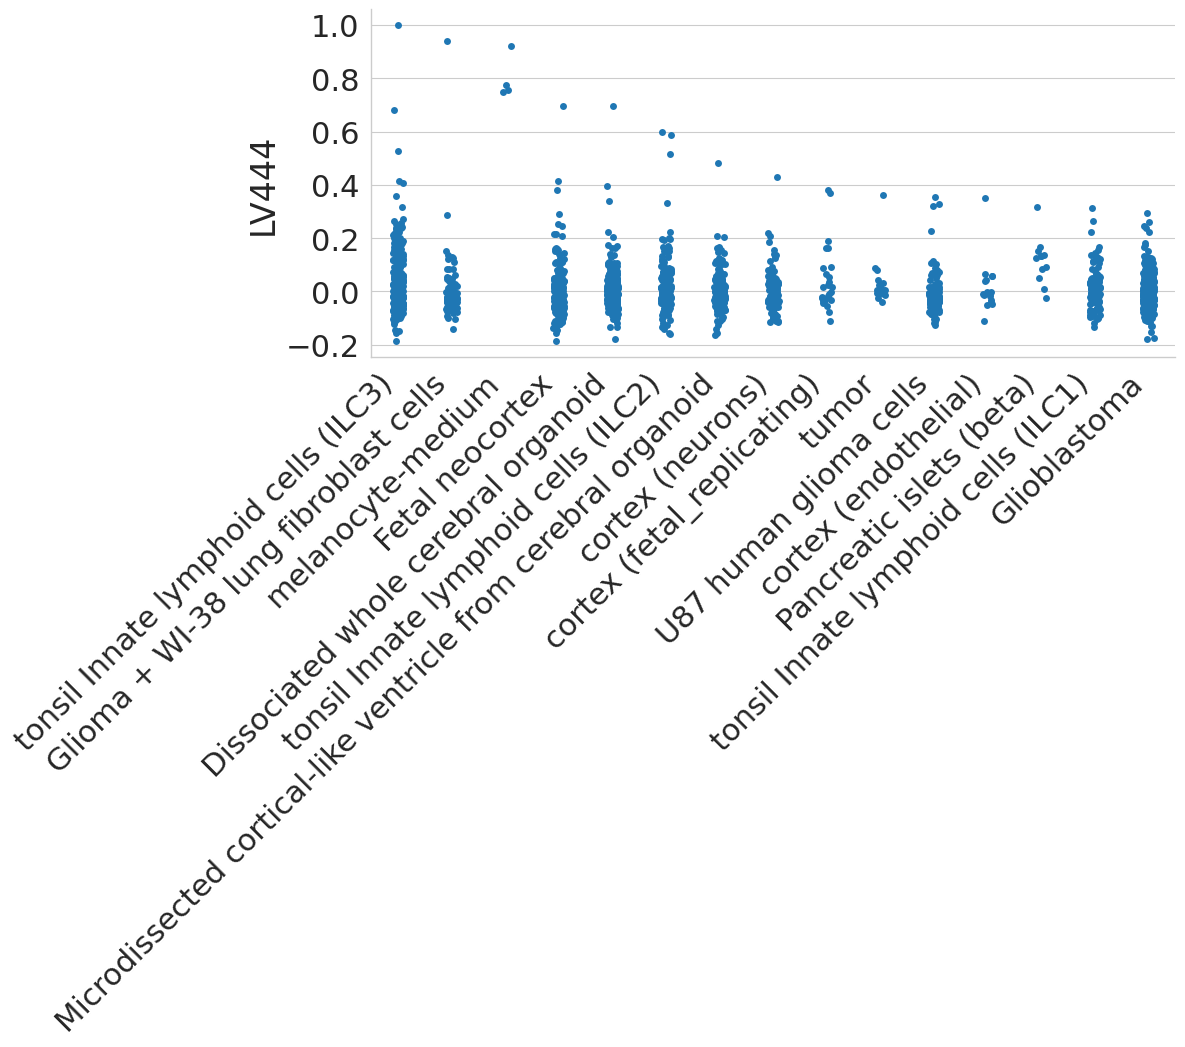

In [188]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [91]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [156]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("^neurons$")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell type     LV444
project   run                           
SRP057196 SRR1974810   neurons  0.427834
          SRR1974780   neurons  0.221034
          SRR1974620   neurons  0.208385
          SRR1974762   neurons  0.184793
          SRR1974787   neurons  0.154978
          SRR1974657   neurons  0.141079
          SRR1974631   neurons  0.136213
          SRR1974656   neurons  0.133110
          SRR1974638   neurons  0.124016
          SRR1974640   neurons  0.113621
          SRR1974605   neurons  0.092719
          SRR1974603   neurons  0.079661
          SRR1974614   neurons  0.077433
          SRR1974710   neurons  0.072000
          SRR1974776   neurons  0.069883
          SRR1974712   neurons  0.063738
          SRR1974652   neurons  0.063709
          SRR1974841   neurons  0.063385
          SRR1974617   neurons  0.062104
          SRR1974609   neurons  0.057985

In [157]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP057196"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

cell type       tissue                 age  \
project   run                                                              
SRP057196 SRR1974810            neurons       cortex  postnatal 21 years   
          SRR1974896  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974888  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974761        endothelial       cortex  postnatal 63 years   
          SRR1974690   oligodendrocytes       cortex  postnatal 50 years   
          SRR1974999    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974720         astrocytes       cortex  postnatal 50 years   
          SRR1974760   oligodendrocytes       cortex  postnatal 63 years   
          SRR1974790   oligodendrocytes  hippocampus  postnatal 63 years   
          SRR1974805   oligodendrocytes       cortex  postnatal 21 years   
          SRR1974957    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974780            neurons       cortex  postnatal 63 years   
          SRR1974620            neurons       cortex  postnatal 37 years   
          SRR1974547             hybrid       cortex  postnatal 54 years   
          SRR1974590          microglia  hippocampus  postnatal 54 years   
          SRR1974914  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974762            neurons       cortex  postnatal 63 years   
          SRR1974962    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974717         astrocytes       cortex  postnatal 50 years   
          SRR1974579                OPC  hippocampus  postnatal 54 years   
          SRR1974708             hybrid       cortex  postnatal 50 years   
          SRR1974743         astrocytes       cortex  postnatal 50 years   
          SRR1974995    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974886  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974894  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974787            neurons       cortex  postnatal 63 years   
          SRR1974826             hybrid       cortex  postnatal 21 years   
          SRR1974850             hybrid       cortex  postnatal 21 years   
          SRR1974657            neurons       cortex  postnatal 37 years   
          SRR1974993    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974631            neurons       cortex  postnatal 37 years   
          SRR1974656            neurons       cortex  postnatal 37 years   
          SRR1974893    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974638            neurons       cortex  postnatal 37 years   
          SRR1974716             hybrid       cortex  postnatal 50 years   
          SRR1974839   oligodendrocytes       cortex  postnatal 21 years   
          SRR1974836   oligodendrocytes       cortex  postnatal 21 years   
          SRR1974699         astrocytes       cortex  postnatal 50 years   
          SRR1974640            neurons       cortex  postnatal 37 years   
          SRR1974591          microglia  hippocampus  postnatal 54 years   
          SRR1974834   oligodendrocytes       cortex  postnatal 21 years   
          SRR1974703         astrocytes       cortex  postnatal 50 years   
          SRR1974919    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974943    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974543   oligodendrocytes       cortex  postnatal 54 years   
          SRR1974960    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974890  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974605            neurons       cortex  postnatal 37 years   
          SRR1974795   oligodendrocytes  hippocampus  postnatal 63 years   
          SRR1974937    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974974    fetal_quiescent       cortex    prenatal 16-18 W   
  

In [ ]:
_tmp["sirs outcomes"].value_counts()

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )